<a href="https://colab.research.google.com/github/Priyanka-Kugapriya/Clustering_notebook/blob/main/Automate_Kmeans_Clustering_Silhouette_Method.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
# pd.set_option('display.max_rows',None,'display.max_columns',None)

In [2]:
df= pd.read_csv("CustomerW3_IT_6_Test_20210225182626301.csv",header=None)

In [3]:
#naming columns
df.columns = ['0','1','2', '3','4','5','6','7','8','9','10','11','12','13','14']

In [4]:
#drop columns of no value
df.drop(['3','5','14', '7', '9', '11', '13'],axis='columns', inplace=True)

In [5]:
#create df
test = df.to_dict(orient="records")

In [6]:
frame_define = []
for i in test:
  key_arr = i.keys()
  for key in key_arr:
    if key not in ['0','1']:
      dc1 = {}
      dc1['X'] = i.get('0')
      dc1['Y'] = i.get('1')
      dc1['Column'] = key
      dc1['Value'] = i.get(key)
      frame_define.append(dc1)

In [7]:
df2 = pd.DataFrame(frame_define)

In [8]:
df2

,X,Y,Column,Value
0,0,0,2,331.497681
1,0,0,4,366.443085
2,0,0,6,0.000000
3,0,0,8,0.000000
4,0,0,10,0.000000
...,...,...,...,...
4070017,94,2293759,4,0.000000
4070018,94,2293759,6,0.000000
4070019,94,2293759,8,0.000000
4070020,94,2293759,10,0.000000


In [9]:
#removed 0 values
df3 = df2.loc[~((df2['Value'] == 0))]

In [10]:
df3

,X,Y,Column,Value
0,0,0,2,331.497681
1,0,0,4,366.443085
6,0,0,2,328.913696
7,0,0,4,362.517304
8,0,0,6,2372.153320
...,...,...,...,...
4069998,94,2293759,2,329.762146
4070004,94,2293759,2,333.106567
4070005,94,2293759,4,363.926758
4070010,94,2293759,2,328.430756


In [11]:
points = 150^2

df3_filtered = df3[(df3["X"]^2 + df3["Y"]^2  > points)]

In [12]:
df3_filtered

,X,Y,Column,Value
14466,152,0,2,328.267670
14467,152,0,4,362.008758
14472,165,0,2,329.303833
14473,165,0,4,364.356018
14478,179,0,2,330.778625
...,...,...,...,...
4069998,94,2293759,2,329.762146
4070004,94,2293759,2,333.106567
4070005,94,2293759,4,363.926758
4070010,94,2293759,2,328.430756


In [13]:
#reset index
df3_filtered.reset_index()

,index,X,Y,Column,Value
0,14466,152,0,2,328.267670
1,14467,152,0,4,362.008758
2,14472,165,0,2,329.303833
3,14473,165,0,4,364.356018
4,14478,179,0,2,330.778625
...,...,...,...,...,...
1486429,4069998,94,2293759,2,329.762146
1486430,4070004,94,2293759,2,333.106567
1486431,4070005,94,2293759,4,363.926758
1486432,4070010,94,2293759,2,328.430756


In [14]:
#reducing dataset
df3_filtered['num']=df3_filtered.index
df3_filtered=df3_filtered[df3_filtered['num']%50==0]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [15]:
X = df3_filtered.iloc[:, [3]].values
df4 = pd.DataFrame(X)

In [16]:
df4

,0
0,332.737396
1,330.063629
2,330.119293
3,329.064087
4,332.305817
...,...
35390,361.759003
35391,329.251679
35392,329.366669
35393,331.729919


In [17]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [18]:
from sklearn.cluster import KMeans

Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(df4)
    Sum_of_squared_distances.append(km.inertia_)

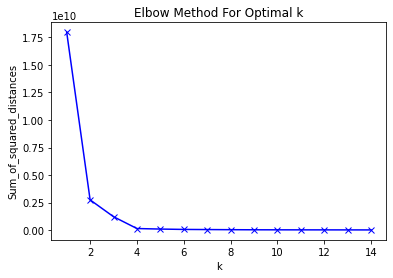

In [19]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [20]:
num_clusters = np.arange(2,10)
results = {}
for size in num_clusters:
    model = KMeans(n_clusters = size).fit(X)
    predictions = model.predict(X)
    results[size] = silhouette_score(X, predictions)

best_size = max(results, key=results.get)

In [21]:
best_size

5

In [22]:
kmeans = KMeans(n_clusters=best_size).fit(df4)
df4['labels'] = kmeans.labels_

In [23]:
df4.columns = ['Values','Labels']

In [24]:
column = df4["Labels"]
total_count = column.count()
value_count = df4['Labels'].value_counts()

In [25]:
df4

,Values,Labels
0,332.737396,0
1,330.063629,0
2,330.119293,0
3,329.064087,0
4,332.305817,0
...,...,...
35390,361.759003,0
35391,329.251679,0
35392,329.366669,0
35393,331.729919,0


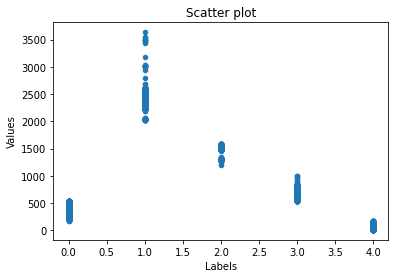

In [26]:
import matplotlib.pyplot as plot

df4.plot.scatter(x="Labels", y="Values", title= "Scatter plot");
plot.show(block=True);

### Analyzing the clusteres dataframe

In [27]:
max_label = value_count/total_count*100
max_label

0    48.876960
3    24.314169
1    13.857890
2    11.476197
4     1.474785
Name: Labels, dtype: float64

In [28]:
df4_label_0 = df4[df4['Labels']==0].copy()
df4_label_1 = df4[df4['Labels']==1].copy()
df4_label_2 = df4[df4['Labels']==2].copy()
df4_label_3 = df4[df4['Labels']==3].copy()
df4_label_4 = df4[df4['Labels']==4].copy()

### Second set of clustering

In [29]:
#label4
df4_label_4['Second_label'] = 4
df4_label_4

,Values,Labels,Second_label
145,14.974587,4,4
146,16.408611,4,4
148,11.322171,4,4
149,11.778818,4,4
150,11.251677,4,4
...,...,...,...
32479,12.127464,4,4
32480,23.867085,4,4
32487,13.844185,4,4
32488,12.608395,4,4


In [30]:
#label0
X0 = df4_label_0.iloc[:, [0]].values
df4_vlabel_0 = pd.DataFrame(X0)

In [31]:
df4_vlabel_0

,0
0,332.737396
1,330.063629
2,330.119293
3,329.064087
4,332.305817
...,...
17295,361.759003
17296,329.251679
17297,329.366669
17298,331.729919


In [32]:
from sklearn.cluster import KMeans

Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(df4_vlabel_0)
    Sum_of_squared_distances.append(km.inertia_)

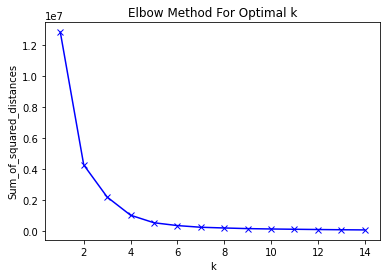

In [33]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

#### Silhouette analysis for label 0

In [34]:
num_clusters = np.arange(2,10)
results = {}
for size in num_clusters:
    model = KMeans(n_clusters = size).fit(df4_vlabel_0)
    predictions = model.predict(df4_vlabel_0)
    results[size] = silhouette_score(df4_vlabel_0, predictions)

best_size0 = max(results, key=results.get)

In [35]:
best_size0

2

In [36]:
kmeans = KMeans(n_clusters=best_size0).fit(df4_vlabel_0)
df4_label_0['Second_label'] = kmeans.labels_

In [37]:
df4_label_0['Second_label'].value_counts()

0    16907
1      393
Name: Second_label, dtype: int64

In [38]:
df4_label_0

,Values,Labels,Second_label
0,332.737396,0,0
1,330.063629,0,0
2,330.119293,0,0
3,329.064087,0,0
4,332.305817,0,0
...,...,...,...
35390,361.759003,0,0
35391,329.251679,0,0
35392,329.366669,0,0
35393,331.729919,0,0


In [39]:
#label1
X1 = df4_label_1.iloc[:, [0]].values
df4_vlabel_1 = pd.DataFrame(X1)

In [40]:
df4_vlabel_1

,0
0,2393.128418
1,2311.965576
2,2310.551758
3,2331.673828
4,2307.728027
...,...
4900,2298.450439
4901,2566.691406
4902,2285.279785
4903,2310.784424


In [41]:
from sklearn.cluster import KMeans

Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(df4_vlabel_1)
    Sum_of_squared_distances.append(km.inertia_)

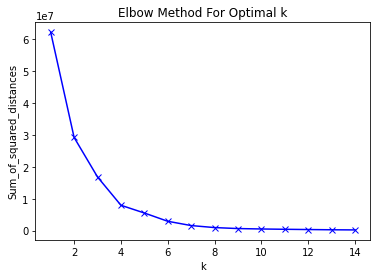

In [42]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [43]:
num_clusters = np.arange(2,10)
results = {}
for size in num_clusters:
    model = KMeans(n_clusters = size).fit(X1)
    predictions = model.predict(X1)
    results[size] = silhouette_score(X1, predictions)

best_size1 = max(results, key=results.get)

In [44]:
best_size1

8

In [45]:
kmeans = KMeans(n_clusters=best_size1).fit(df4_vlabel_1)
df4_label_1['Second_label'] = kmeans.labels_

In [46]:
df4_label_1['Second_label'].value_counts()

4    1208
0    1189
1    1152
7     873
2     423
6      36
5      14
3      10
Name: Second_label, dtype: int64

In [47]:
df4_label_1

,Values,Labels,Second_label
35,2393.128418,1,0
57,2311.965576,1,7
60,2310.551758,1,7
88,2331.673828,1,4
108,2307.728027,1,7
...,...,...,...
35210,2298.450439,1,7
35306,2566.691406,1,2
35313,2285.279785,1,7
35360,2310.784424,1,7


In [48]:
#label2
X2 = df4_label_2.iloc[:, [0]].values
df4_vlabel_2 = pd.DataFrame(X2)

In [49]:
from sklearn.cluster import KMeans

Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(df4_vlabel_2)
    Sum_of_squared_distances.append(km.inertia_)

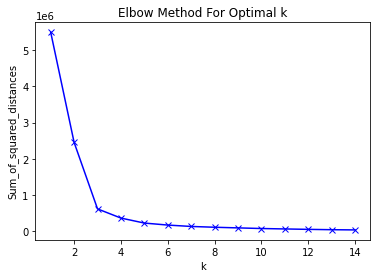

In [50]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [51]:
num_clusters = np.arange(2,10)
results = {}
for size in num_clusters:
    model = KMeans(n_clusters = size).fit(X2)
    predictions = model.predict(X2)
    results[size] = silhouette_score(X2, predictions)

best_size2 = max(results, key=results.get)

In [52]:
best_size2

2

In [53]:
kmeans = KMeans(n_clusters=best_size2).fit(df4_vlabel_2)
df4_label_2['Second_label'] = kmeans.labels_

In [54]:
df4_label_2['Second_label'].value_counts()

0    4003
1      59
Name: Second_label, dtype: int64

In [55]:
#label3
X3 = df4_label_3.iloc[:, [0]].values
df4_vlabel_3 = pd.DataFrame(X3)

In [56]:
from sklearn.cluster import KMeans

Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(df4_vlabel_3)
    Sum_of_squared_distances.append(km.inertia_)

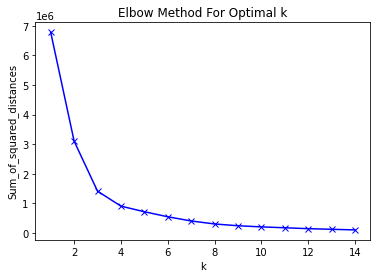

In [57]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [58]:
num_clusters = np.arange(2,10)
results = {}
for size in num_clusters:
    model = KMeans(n_clusters = size).fit(X3)
    predictions = model.predict(X3)
    results[size] = silhouette_score(X3, predictions)

best_size3 = max(results, key=results.get)

In [59]:
best_size3

2

In [60]:
kmeans = KMeans(n_clusters=best_size3).fit(df4_vlabel_3)
df4_label_3['Second_label'] = kmeans.labels_

In [61]:
df4_label_3['Second_label'].value_counts()

0    8475
1     131
Name: Second_label, dtype: int64

In [62]:
#concatenate all the created df
frames = [df4_label_0,df4_label_1,df4_label_2,df4_label_3,df4_label_4]
df_finalized_cluster = pd.concat(frames, keys=['label0', 'label1','label2','label3','label4'])
df_finalized_cluster.dropna()

Values  Labels  Second_label
label0 0      332.737396       0             0
       1      330.063629       0             0
       2      330.119293       0             0
       3      329.064087       0             0
       4      332.305817       0             0
...                  ...     ...           ...
label4 32479   12.127464       4             4
       32480   23.867085       4             4
       32487   13.844185       4             4
       32488   12.608395       4             4
       32489   18.618200       4             4

[35395 rows x 3 columns]

In [63]:
def final_cluster(flabel,slabel):
    if (flabel==0) & (slabel ==0):
         return 0
    elif ((flabel==0) & (slabel ==1)):
         return 1
    elif ((flabel==1) & (slabel ==0)):
         return 2
    elif ((flabel==1) & (slabel ==1)):
         return 3
    elif ((flabel==1) & (slabel ==2)):
         return 4
    elif ((flabel==1) & (slabel ==3)):
         return 5
    elif ((flabel==1) & (slabel ==4)):
         return 6
    elif ((flabel==1) & (slabel ==5)):
         return 7
    elif ((flabel==1) & (slabel ==6)):
         return 8
    elif ((flabel==1) & (slabel ==7)):
         return 9
    elif ((flabel==2) & (slabel ==0)):
         return 10
    elif ((flabel==2) & (slabel ==1)):
         return 11
    elif ((flabel==3) & (slabel ==0)):
         return 12
    elif ((flabel==3) & (slabel ==1)):
         return 13
    elif ((flabel==4) & (slabel ==4)):
         return 14
    else:
         return 15

In [64]:
df_finalized_cluster['Final Cluster'] = df_finalized_cluster.apply(lambda x: final_cluster(x.Labels,x.Second_label), axis=1)

In [65]:
df_finalized_cluster.dropna()

Values  Labels  Second_label  Final Cluster
label0 0      332.737396       0             0              0
       1      330.063629       0             0              0
       2      330.119293       0             0              0
       3      329.064087       0             0              0
       4      332.305817       0             0              0
...                  ...     ...           ...            ...
label4 32479   12.127464       4             4             14
       32480   23.867085       4             4             14
       32487   13.844185       4             4             14
       32488   12.608395       4             4             14
       32489   18.618200       4             4             14

[35395 rows x 4 columns]

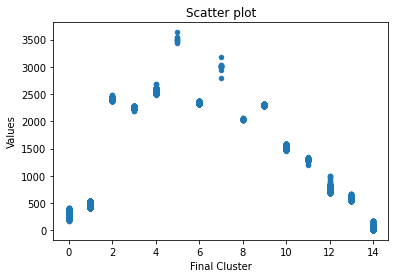

In [66]:
import matplotlib.pyplot as plot

df_finalized_cluster.plot.scatter(x="Final Cluster", y="Values", title= "Scatter plot");
# plot.ylim(0,100)
# plot.xlim(0,20)
plot.show(block=True);

In [67]:
df_finalized_cluster['Final Cluster'].unique()

array([ 0,  1,  2,  9,  6,  4,  3,  7,  5,  8, 10, 11, 12, 13, 14])

In [68]:
print(df_finalized_cluster['Final Cluster'].value_counts())

0     16907
12     8475
10     4003
6      1208
2      1189
3      1152
9       873
14      522
4       423
1       393
13      131
11       59
8        36
7        14
5        10
Name: Final Cluster, dtype: int64


In [69]:
column = df_finalized_cluster['Final Cluster']
total_count = column.count()
value_count = df_finalized_cluster['Final Cluster'].value_counts()

In [70]:
max_label = value_count/total_count*100
max_label

0     47.766634
12    23.944060
10    11.309507
6      3.412911
2      3.359232
3      3.254697
9      2.466450
14     1.474785
4      1.195084
1      1.110326
13     0.370109
11     0.166690
8      0.101709
7      0.039554
5      0.028253
Name: Final Cluster, dtype: float64

In [71]:
df_label6= df_finalized_cluster[df_finalized_cluster['Final Cluster']==6].copy()

In [72]:
df_label6.describe()

,Values,Labels,Second_label,Final Cluster
count,1208.000000,1208.0,1208.0,1208.0
mean,2333.371935,1.0,4.0,6.0
std,8.991088,0.0,0.0,0.0
min,2315.027588,1.0,4.0,6.0
25%,2329.564698,1.0,4.0,6.0
50%,2331.381348,1.0,4.0,6.0
75%,2333.320190,1.0,4.0,6.0
max,2370.620361,1.0,4.0,6.0


In [73]:
def  estimated_flayer_check(Value):
    if 182.019730 <= Value < 404.583710:
        return 0
    elif 680.377930 <= Value < 997.561829:
        return 13 
    elif 1465.609985 <= Value < 1593.281494:
        return 10 
    elif 2315.027588 <= Value < 2333.320190:
        return 2 
    elif 2371.192627 <= Value < 2479.874512:
        return 6 
    else:
        return 20

In [74]:
df3['Estimated_layer'] = df3['Value'].apply(estimated_flayer_check)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [75]:
#encoder reding - real reading
df3['X'] =df3['X']-1291345.5
df3['X'] =df3['X']/6553.6
df3['Y'] =df3['Y'] - 1069419
df3['Y'] =df3['Y']/6553.6

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

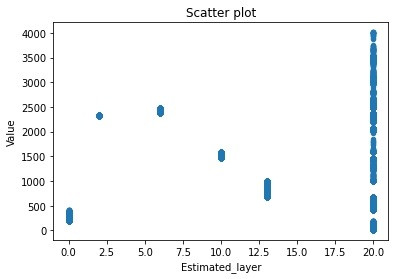

In [76]:
import matplotlib.pyplot as plot

df3.plot.scatter(x="Estimated_layer", y="Value", title= "Scatter plot");
plot.show(block=True);

In [77]:
df3_plot0= df3[df3['Estimated_layer']==0].copy()
df3_plot2= df3[df3['Estimated_layer']==2].copy()
df3_plot6= df3[df3['Estimated_layer']==6].copy()
df3_plot10= df3[df3['Estimated_layer']==10].copy()
df3_plot13= df3[df3['Estimated_layer']==13].copy()

In [86]:
x1=df3_plot0['X']
y1=df3_plot0['Y']
z1=df3_plot0['Value']

x2=df3_plot2['X']
y2=df3_plot2['Y']
z2=df3_plot2['Value']

x3=df3_plot6['X']
y3=df3_plot6['Y']
z3=df3_plot6['Value']

x5=df3_plot10['X']
y5=df3_plot10['Y']
z5=df3_plot10['Value']

x6=df3_plot13['X']
y6=df3_plot13['Y']
z6=df3_plot13['Value']


fig = go.Figure(data=[go.Scatter3d(
    x=x1,
    y=y1,
    z=z1,
    mode='markers',
    marker=dict(
        size=2,
        color=z1,                # set color to an array/list of desired values
        colorscale='peach',      # choose a colorscale
        opacity=0.8
    ) 

),go.Scatter3d(
    x=x2,
    y=y2,
    z=z2,
    mode='markers',
    marker=dict(
        size=2,
        color=z2,                # set color to an array/list of desired values
        colorscale='purp',   # choose a colorscale
        opacity=0.8
    )
),go.Scatter3d(
    x=x3,
    y=y3,
    z=z3,
    mode='markers',
    marker=dict(
        size=2,
        color=z3,                # set color to an array/list of desired values
        colorscale='ylorbr',   # choose a colorscale
        opacity=0.8
    )

),go.Scatter3d(
    x=x5,
    y=y5,
    z=z5,
    mode='markers',
    marker=dict(
        size=2,
        color=z5,                # set color to an array/list of desired values
        colorscale='cividis',   # choose a colorscale
        opacity=0.8
    )
),go.Scatter3d(
    x=x6,
    y=y6,
    z=z6,
    mode='markers',
    marker=dict(
        size=2,
        color=z6,                # set color to an array/list of desired values
        colorscale='tempo',   # choose a colorscale
        opacity=0.8
    )


)])

# tight layout
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.show()

In [79]:
#Plot Distribution plots for the features
import seaborn as sns

plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df_finalized_cluster['Values'])
plt.show()

In [ ]:
#Finding Boundary Values
print("Highest allowed",df_finalized_cluster['Values'].mean() + 3*df_finalized_cluster['Values'].std())
print("Lowest allowed",df_finalized_cluster['Values'].mean() - 3*df_finalized_cluster['Values'].std())

In [ ]:
#Finding the Outliers
df_finalized_cluster[(df_finalized_cluster['Values'] > 2985.4919727155243) | (df_finalized_cluster['Values'] < -1290.4463489589966)]

In [ ]:
#Trimming of Outliers
new_df_finalized_cluster = df_finalized_cluster[(df_finalized_cluster['Values'] > 2985.4919727155243) | (df_finalized_cluster['Values'] < -1290.4463489589966)]
new_df_finalized_cluster

In [ ]:
#Capping on Outliers
upper_limit = df_finalized_cluster['Values'].mean() + 3*df_finalized_cluster['Values'].std()
lower_limit = df_finalized_cluster['Values'].mean() - 3*df_finalized_cluster['Values'].std()

In [ ]:
#Appling the capping
df_finalized_cluster['Values'] = np.where(
    df_finalized_cluster['Values']>upper_limit,
    upper_limit,
    np.where(
        df_finalized_cluster['Values']<lower_limit,
        lower_limit,
       df_finalized_cluster['Values']
    )
)